# # SpringBoard Capstone2: Direct Marketing
## Unit16: Pre-processing and Training Data Development 
> Data from Kaggle.com: https://www.kaggle.com/c/bankdirectmarketing/data 

In [1]:
# pip install imbalanced-learn

In [2]:
# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

0.8.0


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [4]:
market_pre = pd.read_csv('Market_explored.csv', index_col = 0)
print(market_pre.head())

          age           job   marital            education  default housing  \
RecordID                                                                      
13783      49        admin.  divorced  professional.course       no     yes   
23986      52      services   married          high.school  unknown     yes   
20663      46   blue-collar  divorced             basic.9y       no      no   
13958      26  entrepreneur    single          high.school      yes     yes   
28184      47        admin.    single    university.degree       no      no   

         loan   contact month day_of_week  ...  campaign  pdays  previous  \
RecordID                                   ...                              
13783     yes  cellular   aug         mon  ...         1    115         2   
23986      no  cellular   may         mon  ...         1    402         2   
20663      no  cellular   apr         wed  ...         1    999         1   
13958     yes  cellular   aug         fri  ...        28    9

In [5]:
cat = market_pre[['job', 'marital', 'education', 'default', 'housing', \
 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
market_cat = pd.get_dummies(cat,drop_first = True)
print(market_cat.shape)
market_cat.head()

(22500, 43)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
RecordID,,,,,,,,,,,,,,,,,,,,,
13783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23986,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
20663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13958,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28184,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [6]:
num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', \
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
market_num = market_pre[num]
market_all = market_cat.join(market_num)
market_all.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
RecordID,,,,,,,,,,,,,,,,,,,,,
13783,0,0,0,0,0,0,0,0,0,0,...,49,4457,1,115,2,1.4,92.479703,-35.498996,0.705058,4990.198481
23986,0,0,0,0,0,0,1,0,0,0,...,52,4797,1,402,2,-1.8,93.439161,-39.331320,4.245479,5144.563621
20663,1,0,0,0,0,0,0,0,0,0,...,46,169,1,999,1,-1.8,93.075000,-47.100000,1.445000,5099.100000
13958,0,1,0,0,0,0,0,0,0,0,...,26,376,28,999,0,1.4,93.444000,-36.100000,4.967000,5228.100000
28184,0,0,0,0,0,0,0,0,0,0,...,47,3033,1,252,4,-3.4,94.352376,-33.073620,1.208702,5025.420036


#### SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [7]:
def fit_logreg_model(X,y,c):
    over = SMOTE(sampling_strategy=c)
    X, y = over.fit_resample(X, y)
    counter = Counter(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    scaler = preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    return [c, counter, f1_score(y_test, y_pred, average=None), f1_score(y_test, y_pred, average='macro')]


In [8]:
for c in [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    print(fit_logreg_model(market_all,market_pre['subscribe'],c))

[0.3, Counter({'no': 19548, 'yes': 5864}), array([0.87820513, 0.41102181]), 0.6446134711060084]
[0.4, Counter({'no': 19548, 'yes': 7819}), array([0.86116653, 0.51256696]), 0.686866742419308]
[0.5, Counter({'no': 19548, 'yes': 9774}), array([0.84050514, 0.57079924]), 0.7056521949016891]
[0.6, Counter({'no': 19548, 'yes': 11728}), array([0.78739957, 0.64311711]), 0.7152583359633451]
[0.7, Counter({'no': 19548, 'yes': 13683}), array([0.75806036, 0.66137184]), 0.7097160985502766]
[0.8, Counter({'no': 19548, 'yes': 15638}), array([0.77895001, 0.71213608]), 0.7455430468424722]
[0.9, Counter({'no': 19548, 'yes': 17593}), array([0.83453419, 0.81157334]), 0.8230537669532378]
[1, Counter({'no': 19548, 'yes': 19548}), array([0.70713162, 0.72116825]), 0.7141499339873252]


### use sampling_strategy = 0.9 for SMOTE( ) over sampling for category 1, f1_macro = 0.746

In [9]:
# # build scaler based on training data and apply it to test data to then also scale the test data
## This is not the best of all
# import sklearn.preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled=scaler.transform(X_train)
# X_test_scaled=scaler.transform(X_test)
# X_train_scaled[0:1]

In [10]:
## Use MinMaxScaler() after test: this is the best
# scaler = preprocessing.MinMaxScaler().fit(X_train)
# X_train_scaled=scaler.transform(X_train)
# X_test_scaled=scaler.transform(X_test)
# X_train_scaled[0:1]

In [11]:
## scale only numerical columns
# scaler = preprocessing.StandardScaler().fit(X_train[num])
# X_train_scaled=scaler.transform(X_train[num])
# X_test_scaled=scaler.transform(X_test[num])

In [12]:
# # Instantiate the logistic regression classifier: logreg
# logreg = LogisticRegression()
# # Fit it to the training data
# logreg.fit(X_train,y_train)
# y_pred = logreg.predict(X_test)
# # Compute and print the confusion matrix and classification report
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [13]:
X = market_all
y = market_pre['subscribe']

over = SMOTE(sampling_strategy=0.9)
X, y = over.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
from sklearn.model_selection import GridSearchCV
# Create the hyperparameter grid
c_space = np.logspace(-4, 4, 30)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro')
# Fit it to the training data
logreg_cv.fit(X_train,y_train)
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Average f1_macro: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.00018873918221350977, 'penalty': 'l2'}
Tuned Logistic Regression Average f1_macro: 0.7529023684821268


In [15]:
X = market_all
y = market_pre['subscribe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled[0:1]

RF = RandomForestClassifier(max_depth=3, random_state = 1)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

print('f1_no_average: ', f1_score(y_test, y_pred, average=None))
print('f1_macro: ', f1_score(y_test, y_pred, average='macro'))


f1_no_average:  [0.93073542 0.        ]
f1_macro:  0.4653677082095759


In [16]:
def fit_RF_model(X,y,c):
    over = SMOTE(sampling_strategy=c)
    X, y = over.fit_resample(X, y)
    counter = Counter(y)
    print('c: ', c, ', Counter: ', counter)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    scaler = preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    X_train_scaled[0:1]

    RF = RandomForestClassifier(max_depth=3, random_state = 1)
    RF.fit(X_train,y_train)
    y_pred = RF.predict(X_test)
 
    print('f1_none: ', f1_score(y_test, y_pred, average=None))
    print('f1_macro: ', f1_score(y_test, y_pred, average='macro')) 
    


In [17]:
for c in [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    print(fit_RF_model(market_all,market_pre['subscribe'],c))

c:  0.3 , Counter:  Counter({'no': 19548, 'yes': 5864})
f1_none:  [0.87660437 0.14641745]
f1_macro:  0.5115109069341823
None
c:  0.4 , Counter:  Counter({'no': 19548, 'yes': 7819})
f1_none:  [0.8620462  0.32508073]
f1_macro:  0.593563468295161
None
c:  0.5 , Counter:  Counter({'no': 19548, 'yes': 9774})
f1_none:  [0.86807269 0.58238636]
f1_macro:  0.7252295291370061
None
c:  0.6 , Counter:  Counter({'no': 19548, 'yes': 11728})
f1_none:  [0.86442669 0.7115    ]
f1_macro:  0.7879633458646615
None
c:  0.7 , Counter:  Counter({'no': 19548, 'yes': 13683})
f1_none:  [0.84625588 0.74505099]
f1_macro:  0.7956534341268728
None
c:  0.8 , Counter:  Counter({'no': 19548, 'yes': 15638})
f1_none:  [0.8389662  0.78500332]
f1_macro:  0.8119847603166667
None
c:  0.9 , Counter:  Counter({'no': 19548, 'yes': 17593})
f1_none:  [0.83949367 0.81776373]
f1_macro:  0.8286286980472346
None
c:  1 , Counter:  Counter({'no': 19548, 'yes': 19548})
f1_none:  [0.82682002 0.83414695]
f1_macro:  0.8304834877927088
Non

### use SMOTE(sample_strategy = 0.9) for RandomForest model also.

In [18]:
# do the procedures again
X = market_all
y = market_pre['subscribe']

over = SMOTE(sampling_strategy=0.9)
X, y = over.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### RansomForest hyperparameter tuning: <br> https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [19]:
# Searching for better hyperparameters
# Define Parameters
max_depth=[8, 16, 32]
n_estimators = [8, 32, 64, 256]
param_grid = {'max_depth': max_depth, 
              'n_estimators': n_estimators}

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state = 1)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5, scoring = 'f1_macro')
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df


Best: [0.88558293 0.8912273  0.89248817 0.89276248 0.91365576 0.92097947
 0.92235298 0.92333905 0.91527732 0.92499793 0.92782236 0.92810756], using {'max_depth': 32, 'n_estimators': 256}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.216159,0.009166,0.059863,0.003532,8,8,"{'max_depth': 8, 'n_estimators': 8}",0.877571,0.888635,0.882191,0.885821,0.893697,0.885583,0.005494,12
1,0.691642,0.008222,0.075978,0.002632,8,32,"{'max_depth': 8, 'n_estimators': 32}",0.887117,0.894543,0.891430,0.889230,0.893816,0.891227,0.002779,11
2,1.289503,0.009183,0.098651,0.002796,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.889791,0.892651,0.891739,0.893611,0.894649,0.892488,0.001661,10
3,5.069083,0.045680,0.238732,0.007952,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.887969,0.895149,0.892249,0.893459,0.894986,0.892762,0.002622,9
4,0.316689,0.015151,0.063727,0.001470,16,8,"{'max_depth': 16, 'n_estimators': 8}",0.910051,0.908717,0.911333,0.922235,0.915943,0.913656,0.004932,8
5,1.083805,0.007205,0.093154,0.003608,16,32,"{'max_depth': 16, 'n_estimators': 32}",0.915514,0.914976,0.923205,0.929673,0.921529,0.920979,0.005417,6
6,2.091027,0.010207,0.128458,0.002260,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.916683,0.916992,0.921852,0.932193,0.924045,0.922353,0.005672,5
7,8.397560,0.048803,0.366191,0.011149,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.919214,0.919008,0.923381,0.928159,0.926934,0.923339,0.003793,4
8,0.351139,0.007809,0.060764,0.000722,32,8,"{'max_depth': 32, 'n_estimators': 8}",0.912690,0.914017,0.912804,0.920099,0.916776,0.915277,0.002825,7
9,1.258002,0.006826,0.096546,0.002945,32,32,"{'max_depth': 32, 'n_estimators': 32}",0.918947,0.921909,0.924934,0.930043,0.929156,0.924998,0.004217,3


f1_macro_grid:  0.9256627992626503
[[3725  203]
 [ 346 3155]]


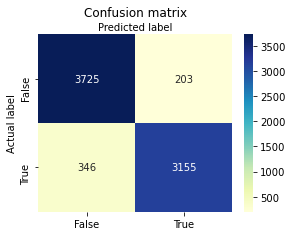

In [32]:
# Extract the best decision forest after gridsearchCV
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)

# Print F_macro value after gridsearch
f1_macro = f1_score(y_test, y_pred, average='macro')
print('f1_macro_grid: ', f1_macro)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

In [21]:
# Try RandomSearchCV using more hyper parameters
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1, scoring = 'f1_macro')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, scoring='f1_macro', verbose=2)

In [22]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [28]:
# Extract the best decision forest after randomsearch
best_clf = rf_random.best_estimator_
y_pred = best_clf.predict(X_test)

#f1_macro
f1_macro = f1_score(y_test, y_pred, average='macro')
print('f1_macro_random: ', f1_macro)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

f1_macro_random:  0.9269637105912469
[[3747  181]
 [ 358 3143]]


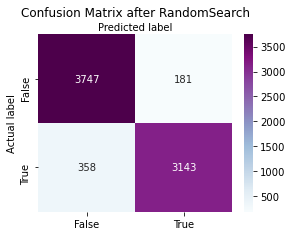

In [31]:
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='BuPu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix after RandomSearch')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

## Use hyperparameters picked by RandomSearchCV based on a slightly better F1_macro score